# Install rdkit

using pypi or whatever install rdkit


In [1]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 34.7 MB/s eta 0:00:00:00:0100:01


## Ex 1. Read molecules from SMILES

SMILES (Simplified Molecular-Input Line-Entry System) is a popular method for specifying molecules with text string. The RDkit library provides utilities to read molecules from SMILES.


Paracetamol (Acetaminophen) is a commonly used medicine that can help treat pain and reduce a high temperature. It's given by the chemical formula $ C_8H_9N O_2$ and its SMILES is "CC(=O)NC1=CC=C(O)C=C1".


1. Create the paracetamol molecule from its SMILES using the rdkit.Chem.MolFromSmiles class.


2. Visualize its structure (it's sufficient to print the paracetamol molecule or to use rdkit.Chem.Draw.MolToImage())


3. Print out the number of atoms. Did you get 11 ? It should be 20 atoms ? Why ?



4. Print out the list of atoms.


5. Find the number of bonds.



Creating the paracetamol molecule

In [2]:
from rdkit import Chem

smiles_paracetamol = "CC(=O)NC1=CC=C(O)C=C1"
paracetamol_molecule = Chem.MolFromSmiles(smiles_paracetamol)

Visualizing it

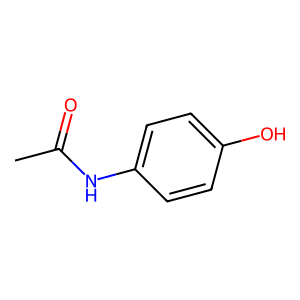

In [3]:
from rdkit.Chem import Draw

Draw.MolToImage(paracetamol_molecule)

In [4]:
num_atoms = paracetamol_molecule.GetNumAtoms()
print(f"Number of atoms: {num_atoms}")

Number of atoms: 11


I indeed got 11. It should be 20 because that's the number of atoms of this molecule if we count all molecules. Here, it is 11 because we don't dount the H.

Print the list of atoms

In [5]:
atoms_list = [paracetamol_molecule.GetAtomWithIdx(i).GetSymbol() for i in range(num_atoms)]
print(f"List of atoms: {atoms_list}")

List of atoms: ['C', 'C', 'O', 'N', 'C', 'C', 'C', 'C', 'O', 'C', 'C']


Find de number of bouds

In [6]:
num_bonds = paracetamol_molecule.GetNumBonds()
print(f"Number of bonds: {num_bonds}")

Number of bonds: 11


## Ex 2 Read data from chemical file format

Apart SMILES, .SDF/ .Mol are also the common formats to save molecules. RDKit provides also functionalities to read these files.


Morphine is an opioid agonist used for the relief of moderate to severe acute and chronic pain. The chemical information of this drug can be found at
the following url: https://go.drugbank.com/structures/small_molecule_drugs/DB00295.sdf


1. Download this file and save it in a folder.


2. Read the morphine molecule from the file that you've downloaded using "rdkit.Chem.SDMolSupplier"


3. With the help of rdkit.Chem.AllChem.GetMorganFingerprintAsBitVect, compute its fingerprint as a bit vector.

Downloading the file and saving it

In [7]:
import requests
import os

url = "https://go.drugbank.com/structures/small_molecule_drugs/DB00295.sdf"

os.mkdir('molecules')
file_path = "molecules/morphine.sdf"

# Downloading the file and getting the repsponse status
response = requests.get(url)

# Save if it was successful
if response.status_code == 200:
    with open(file_path, 'wb') as file:
        file.write(response.content)

Reading the file

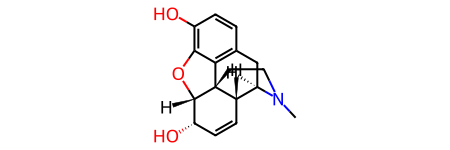

In [8]:
sdf_file_path = '/kaggle/working/molecules/morphine.sdf'
suppl = Chem.SDMolSupplier(sdf_file_path)
morphine_molecule = suppl[0]
morphine_molecule

Compute its fingerprint as a bit vector

In [9]:
from rdkit.Chem import AllChem

fingerprint = AllChem.GetMorganFingerprintAsBitVect(morphine_molecule, radius=2)

fingerprint_array = list(fingerprint)
print(f"Morphine Fingerprint: {fingerprint_array}")

Morphine Fingerprint: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

[19:43:01] DEPRECATION WARNING: please use MorganGenerator


## EX3. Fingerprints


A chemical structure can be characterized by a set of numerical values known as molecular fingerprints. They may be 2D Fragment-based fingerprints presented by bit arrays of 0s and 1s wherein each bit position indicates the presence or absence of structural fragments.


The RDKit has a variety of built-in functionality for generating molecular fingerprints and then using them to calculate molecular similarity. In this exercise, we will generate the fingerprints for parcetamol and aspirin that are two popular drugs used for pains.



1. Compute the fingerprint of the paracetamol as bit vector by using the rdkit.AllChem.GetMorganFingerprintAsBitVectCompute Class. Convert it to a numpy vector. Known that Paracetamol's SMILES is ""CC(=O)OC1=CC=CC=C1C(O)=O". Choose the number of bits nBits= 1024. Find the elements that are nonzero of the vector.

2. Do the same thing for the aspirin. Aspirin's SMILES is "CC(=O)NC1=CC=C(O)C=C1".



3. Using rdkit.DataStructs.DiceSimilarity(), compute the DiceSimilarity between the fingerprints of the paracetamol and the aspirin.

1. paracetamol

In [10]:
from rdkit.Chem.AllChem import GetMorganFingerprintAsBitVect
from rdkit.DataStructs import ConvertToNumpyArray
import numpy as np

# Computer the paracetamol as bit vector
fingerprint_paracetamol = GetMorganFingerprintAsBitVect(paracetamol_molecule, radius=2, nBits=1024)

# Converting it to a numpy vector
paracetamol_fp_array = np.zeros((1024,), dtype=int)
ConvertToNumpyArray(fingerprint_paracetamol, paracetamol_fp_array)

# Find the nonzero elements
nonzero_elements = np.nonzero(paracetamol_fp_array)[0]
print(f"Nonzero elements : {nonzero_elements}")

Nonzero elements : [  33   53  128  191  245  289  356  530  578  650  726  745  754  792
  807  843  849  893 1017]


[19:43:01] DEPRECATION WARNING: please use MorganGenerator


2. aspirine

In [11]:
smiles_aspirine = "CC(=O)OC1=CC=CC=C1C(=O)O"
aspirine_mol = Chem.MolFromSmiles(smiles_aspirine)

# Computer the paracetamol as bit vector
fingerprint_aspirine = GetMorganFingerprintAsBitVect(aspirine_mol, radius=2, nBits=1024)

# Converting it to a numpy vector
aspirine_fp_array = np.zeros((1024,), dtype=int)
ConvertToNumpyArray(fingerprint_aspirine, aspirine_fp_array)

# Find the nonzero elements
nonzero_elements = np.nonzero(aspirine_fp_array)[0]
print(f"Nonzero elements : {nonzero_elements}")

Nonzero elements : [  11   23   33   64  175  356  386  389  423  444  456  592  650  695
  705  726  751  807  849  893  909  946  967 1017]


[19:43:01] DEPRECATION WARNING: please use MorganGenerator


3. dice similarity

In [12]:
from rdkit.DataStructs import DiceSimilarity

dice_similarity = DiceSimilarity(fingerprint_aspirine, fingerprint_paracetamol)

# Print the Dice similarity score
print(f"Dice similarity between Aspirin and Paracetamol: {dice_similarity:.4f}")

Dice similarity between Aspirin and Paracetamol: 0.3721


## EX 4: Descriptors

Molecules are also described by a set of physiochemical descriptors. They should be the log partition coefficient, the polar surface area ... that describe the molecule's structure.


RDKit provides utilities that allow us to compute descriptor of molecules.
Using the rdkit.ML.Descriptors.MoleculeDescriptors.MolecularDescriptorCalculator class, compute the descriptor for paracetamol molecule from SMILES string. Note that SMILES string for paracetamol is "CC(=O)NC1=CC=C(O)C=C1"



In [13]:
from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator
from rdkit.Chem import Descriptors

descriptor_names = [desc_name for desc_name, _ in Descriptors._descList]

calc = MolecularDescriptorCalculator(descriptor_names)

paracetamol_descriptors = calc.CalcDescriptors(paracetamol_molecule)

for name, value in zip(descriptor_names, paracetamol_descriptors):
    print(f"{name}: {value}")

MaxAbsEStateIndex: 10.524468537414966
MaxEStateIndex: 10.524468537414966
MinAbsEStateIndex: 0.11510204081632636
MinEStateIndex: -0.11510204081632636
qed: 0.5950261967780849
SPS: 9.181818181818182
MolWt: 151.165
HeavyAtomMolWt: 142.093
ExactMolWt: 151.063328528
NumValenceElectrons: 58
NumRadicalElectrons: 0
MaxPartialCharge: 0.22074743631242583
MinPartialCharge: -0.5079643157925783
MaxAbsPartialCharge: 0.5079643157925783
MinAbsPartialCharge: 0.22074743631242583
FpDensityMorgan1: 1.3636363636363635
FpDensityMorgan2: 1.9090909090909092
FpDensityMorgan3: 2.3636363636363638
BCUT2D_MWHI: 16.25468871437965
BCUT2D_MWLOW: 10.280190859964755
BCUT2D_CHGHI: 1.9280360590359866
BCUT2D_CHGLO: -1.9945540738765895
BCUT2D_LOGPHI: 2.12524757916018
BCUT2D_LOGPLOW: -2.04401131261029
BCUT2D_MRHI: 5.88095478459792
BCUT2D_MRLOW: -0.11373578338266109
AvgIpc: 1.9291266251851134
BalabanJ: 2.7362980721056545
BertzCT: 253.29949758389105
Chi0: 8.267584713501616
Chi0n: 6.164862962722325
Chi0v: 6.164862962722325
Chi1

[19:43:01] DEPRECATION WARNING: please use MorganGenerator
[19:43:01] DEPRECATION WARNING: please use MorganGenerator
[19:43:01] DEPRECATION WARNING: please use MorganGenerator


## Ex5: SMART (skip)

In many commonly used applications, we need to determine whether atoms in a molecule match a particular pattern. It can be used for filtering structures or identifying substructures that are associated with toxicological problem.

SMART us an extension of the SMILES language that can be used to create queries.

1. Find molecules in the following list named "smiles_list" that contain the "CCC" pattern (you can use the GetSubstructMatch class).


2. Highlight the pattern "CCC" in these molecules.


3. Do the same thing ex 1 but for the pattern "C(=O)N".

## Ex6: Machine learning with RDkit - Predict solubility

In this exercise, we will use machine learning to predict solubility of molecules. For this purpose, we will borrow a dataset from rdkit that is originated from the Huuskonen dataset. We will try to predict Aqueous Solubility for molecules that is known as "logS".


This exercise is divided into 3 parts: Preparing a dataset, training a model and preparing dataset for prediction and applying a predictive model.



## EX6.I Preparing dataset

Preparing dataset requires a few steps:


1. Download file from the following link: https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/solubility.train.sdf.


2. With the help of rdkit.Chem.SDMolSupplier, get list of molecules contained in this file. You should call this list as **molecule_list**. The option **removeHs=False** should be chosen.


3. Write a function named **calculate_descriptors(mol)** that allows us to calculate descriptors of a molecule. This function takes a Rdkit molecule as input and returns an array vector of descriptors.


4. Apply the function **caluclate_descriptors** to the list of molecules **molecule_list** and store the result in a dataframe named **df**. Look at few rows of **df** to see whether the descriptors are calculated.


5. For each molecule from this dataset, we can get the aqueous solubility (logS) via attribute **getProp('SOL')**. Create a list that contains the aqueous solubility of all molecules from the **molecule_list** list. You should call this list by **labels**. Remember to convert these values to float format.


6. Plot the histogram of the "labels" list to see the distribution of the solubility of molecules. Do you have some comments about the aqueous solubility of molecules ?



Downloading data

In [16]:
url = "https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/solubility.train.sdf"
file_path = "molecules/train.sdf"
# Downloading the file and getting the repsponse status
response = requests.get(url)

# Save if it was successful
if response.status_code == 200:
    with open(file_path, 'wb') as file:
        file.write(response.content)

Get the list of molecules

In [22]:
from rdkit.Chem import SDMolSupplier

molecule_list = SDMolSupplier(file_path, removeHs=False)

Calculate descriptors

In [23]:
def calculate_descriptors(mol):
    descriptor_names = [desc_name for desc_name, _ in Descriptors._descList]
    calc = MolecularDescriptorCalculator(descriptor_names)
    return calc.CalcDescriptors(mol)

Apply the function **caluclate_descriptors** to the list of molecules **molecule_list** and store the result in a dataframe

In [25]:
import pandas as pd
from IPython.display import clear_output

descriptors_list = [calculate_descriptors(mol) for mol in molecule_list]
df = pd.DataFrame(descriptors_list, columns=[desc_name for desc_name, _ in Descriptors._descList])

# I had a HUGE amount of depreciation warnings if I used the functions that are asked in this tp, so I cleared these outputs for more visibility
clear_output(wait=True)

print(df.head())

   MaxAbsEStateIndex  MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex  \
0           2.211806        2.211806           1.343750        1.343750   
1           1.500000        1.500000           1.500000        1.500000   
2           2.231806        2.231806           1.355000        1.355000   
3           2.253472        2.253472           0.898148        0.898148   
4           2.243056        2.243056           0.541667        0.541667   

        qed   SPS   MolWt  HeavyAtomMolWt  ExactMolWt  NumValenceElectrons  \
0  0.468786   8.4  72.151          60.055    72.09390                   32   
1  0.408362  24.0  70.135          60.055    70.07825                   30   
2  0.462954   9.0  86.178          72.066    86.10955                   38   
3  0.483890  10.0  86.178          72.066    86.10955                   38   
4  0.424482  12.0  86.178          72.066    86.10955                   38   

   ...  fr_sulfide  fr_sulfonamd  fr_sulfone  fr_term_acetylene  fr_tetrazole  \

get labels

In [26]:
labels = [float(mol.GetProp('SOL')) for mol in molecule_list if mol is not None]

ploting the histograms of the labels

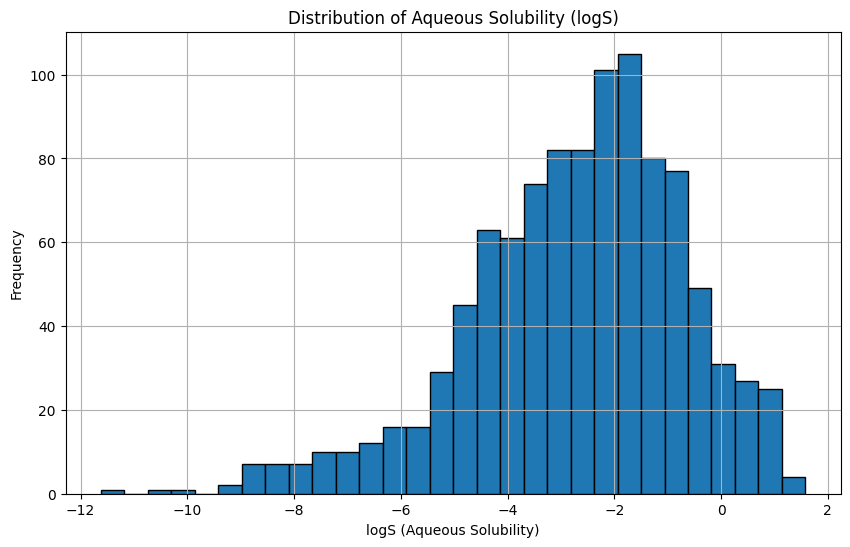

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(labels, bins=30, edgecolor='black')
plt.title('Distribution of Aqueous Solubility (logS)')
plt.xlabel('logS (Aqueous Solubility)')
plt.ylabel('Frequency')
plt.grid()
plt.show()

## Ex6.II Feature Engineering and Training a model of regression.

Now, we have the **df** dataframe that contains the descriptors for molecules and the **labels** list that contains the solvant property of molecules.

1. Check the dataframe **df** to see whether it contains NaN values. How many row contained NaN values are there in the dataframe **df** ? Remove these rows from  **df** and **labels**.


2. Apply the MinMaxScaler to the dataframe **df** to normalize the data.


3. Construct and train a regression model.


4. Calculate the square root error for the dataset

Checking the Nan values and removing them

In [29]:
nan_rows = df.isna().sum().sum()
print(f"Total NaN values in DataFrame: {nan_rows}")

# Cleaning it
df_cleaned = df.dropna()
labels_cleaned = [label for i, label in enumerate(labels) if i < len(df) and not np.isnan(labels[i])]

Total NaN values in DataFrame: 12


Applying the MinMaxScaler to the df

In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_cleaned), columns=df_cleaned.columns)
indices_to_keep = df_cleaned.index.tolist()
labels_cleaned = [labels[i] for i in indices_to_keep if i < len(labels)]

In [34]:
df_normalized.head()

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0.045160,0.045160,0.354103,0.913346,0.401233,0.084864,0.042084,0.033447,0.042052,0.072581,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.0
1,0.000000,0.000000,0.395291,0.933978,0.323502,0.330025,0.038831,0.033447,0.038797,0.064516,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.046428,0.046428,0.357068,0.914831,0.393731,0.094293,0.064721,0.053504,0.064685,0.096774,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.214286,0.0
3,0.047803,0.047803,0.236639,0.854507,0.420664,0.110008,0.064721,0.053504,0.064685,0.096774,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.047142,0.047142,0.142668,0.807435,0.344239,0.141439,0.064721,0.053504,0.064685,0.096774,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


Constructing and training a regression model

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X = df_normalized
y = np.array(labels_cleaned)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Calculating the square root error

In [43]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # squared=False gives RMSE
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 0.646972878579077


## Ex6.III Prepare data for test  and test model


1. Download file from : https://github.com/rdkit/rdkit/blob/master/Docs/Book/data/solubility.test.sdf

2. Read molecules from this file and store them in a list named **list_molecule_test**.


3. Take a molecule from the **list_molecule_test** and then calculate its descriptions thank to the **calculate_descriptors(mol)** function that you've coded above.


4. Apply **minmaxscaler** to these descriptors. Note that **minmaxscaler**  is one that you've created at Ex6.II.


5. Use the model that you've trained to predict the aqueous solubility (logS) of the molecule. Compare to the real logS value of the molecule.

6. (Optional) Calculate the mean square root error of the model for this dataset.



Note: If there exists problem of reading the file solubility.test.sdf as
"RDKit ERROR: [09:28:36] ERROR: moving to the beginning of the next molecule
RDKit ERROR: [09:32:48] ERROR: Counts line too short: '' on line4"
so, go to the url, click "raw" and save this file by hand. The error will be gone away


Downloading the file

In [44]:
url = "https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/solubility.test.sdf"
file_path = "molecules/test.sdf"
# Downloading the file and getting the repsponse status
response = requests.get(url)

# Save if it was successful
if response.status_code == 200:
    with open(file_path, 'wb') as file:
        file.write(response.content)

Reading and storing the molecules

In [46]:
list_molecule_test = SDMolSupplier(file_path, removeHs=False)

Calculate the descriptors of a molecule

In [47]:
mol_test = list_molecule_test[4]
descriptors_test = calculate_descriptors(mol_test)

[20:18:37] DEPRECATION WARNING: please use MorganGenerator
[20:18:37] DEPRECATION WARNING: please use MorganGenerator
[20:18:37] DEPRECATION WARNING: please use MorganGenerator


Applying MinMaxScaler

In [48]:
descriptors_test_scaled = scaler.transform([descriptors_test])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Using the model

In [51]:
predicted_logS = model.predict(descriptors_test_scaled)
print(f"Predicted logS: {predicted_logS[0]}")

real_logS = float(mol_test.GetProp('SOL'))
print(f"Real logS: {real_logS}")

difference = predicted_logS[0] - real_logS
print(f"Difference between predicted and real : {difference}")

Predicted logS: -1.9095
Real logS: -2.09
Difference between predicted and real : 0.18049999999999988


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
